In [1]:
%matplotlib inline
from IPython.display import Image
Image('image_path')

import pandas as pd
test = pd.read_csv('./sp21_student_kaggle.csv')

1. Create an undirected bipartite graph by referring to the following documentation. 
(https://networkx.org/documentation/stable/reference/algorithms/bipartite.html)
REF : https://www.researchgate.net/figure/Undirected-Directed-Weighted-Bipartite-graphs-A-Undirected-Graph-V-V-1-V-2_fig1_51083566
2. Create a node-link diagram differentiating the two types of nodes. For example, you
can use different colors to denote Person and Dataset. Also, encode edge weights into
the visualization. For example, you can use alpha or width to encode edge weights
3. Answer this question, “How many components are there in this graph?”
4. Extract the largest component by referring to the following documentation. This largest component is called the “main component” of the graph. (https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.components.connected_components.html)
5. List the names of people who do not belong to the main component
6. Convert the main component (which is still a bipartite graph) into two unipartite graphs by referring to the following documentation. (https://networkx.org/documentation/stable/reference/algorithms/bipartite.html)
7. Visualize both persons graph and datasets graph using node-link diagrams.
8. Compute closeness centralities for all nodes in the persons graph.
9. Compute betweenness centralities for all nodes in the persons graph
10. Compute the correlation coefficient between the two centrality measures.

0.5


({1, 2, 3, 4}, {'a', 'b', 'c'})

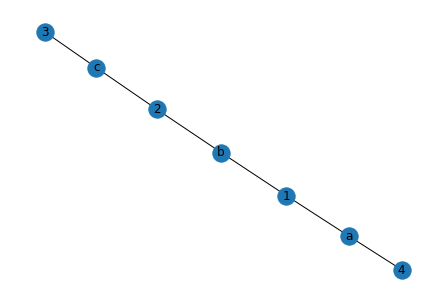

In [2]:
# example 
from networkx.algorithms import bipartite
import networkx as nx
B = nx.Graph()
# Add nodes with the node attribute "bipartite"
B.add_nodes_from([1, 2, 3, 4], bipartite=0)
B.add_nodes_from(["a", "b", "c"], bipartite=1)
# Add edges only between nodes of opposite node sets
B.add_edges_from([(1, "a"), (1, "b"), (2, "b"), (2, "c"), (3, "c"), (4, "a")])
# nx.is_connected(B) True
bottom_nodes, top_nodes = bipartite.sets(B)
top_nodes = {n for n, d in B.nodes(data=True) if d["bipartite"] == 0}
bottom_nodes = set(B) - top_nodes
print(round(bipartite.density(B, bottom_nodes), 2))
# 0.5
G = bipartite.projected_graph(B, top_nodes)
RB = bipartite.random_graph(5, 7, 0.2)
RB_top = {n for n, d in RB.nodes(data=True) if d["bipartite"] == 0}
RB_bottom = set(RB) - RB_top
list(RB_top)
# [0, 1, 2, 3, 4]
list(RB_bottom)
# [5, 6, 7, 8, 9, 10, 11]

# REF : https://frhyme.github.io/python-lib/nx_bipartite/
'''
cbg = nx.complete_bipartite_graph(3, 7)
bs1, bs2 = nx.bipartite.sets(cbg)## bipartite 세트로 나누어줍니다. 

plt.figure(figsize=(8, 4))
nx.draw_networkx(cbg, pos = nx.shell_layout(cbg))
plt.axis('off')
plt.savefig("../../assets/images/markdown_img/180810_bipartite_cg.svg")
plt.show()
'''
# https://stackoverflow.com/questions/27084004/bipartite-graph-in-networkx
nx.draw(B,with_labels=True)
bipartite.sets(B)

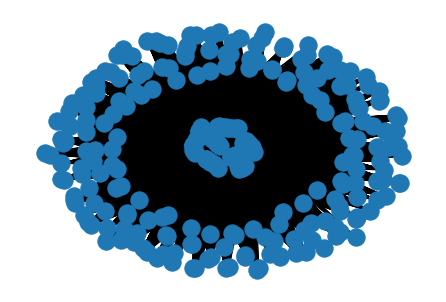

In [3]:
prob1 = nx.Graph()
# Add nodes with the node attribute "bipartite"
prob1.add_nodes_from(list(test.Name), bipartite=0)
prob1.add_nodes_from(list(test.Kaggle), bipartite=1)
node_set = []
for ii in test.Name:
    for jj in test.Kaggle:
        node_set.append((ii,jj))
prob1_edge = list(set(node_set)) # len : 11928
prob1.add_edges_from(prob1_edge)
# Add edges only between nodes of opposite node sets
# prob1.add_edges_from([(1, "a"), (1, "b"), (2, "b"), (2, "c"), (3, "c"), (4, "a")])
# nx.is_connected(B) True
# bottom_nodes, top_nodes = bipartite.sets(prob1)
# top_nodes = {n for n, d in prob1.nodes(data=True) if d["bipartite"] == 0}
# bottom_nodes = set(prob1) - top_nodes
nx.draw(prob1) #,with_labels=True)

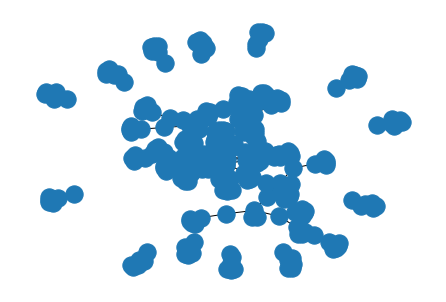

In [74]:
# https://towardsdatascience.com/visualizing-networks-in-python-d70f4cbeb259
G = nx.from_pandas_edgelist(test,source='Name',target='Kaggle',edge_attr='Weight')
nx.draw(G)

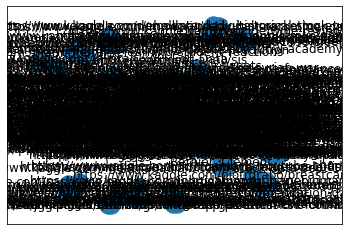

In [5]:
nx.draw_networkx(G)

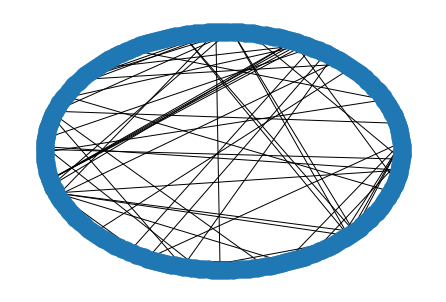

In [6]:
nx.draw_circular(G)

/home/chongmin/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


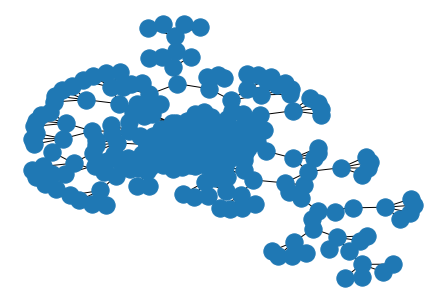

In [ ]:
nx.draw_kamada_kawai(G)

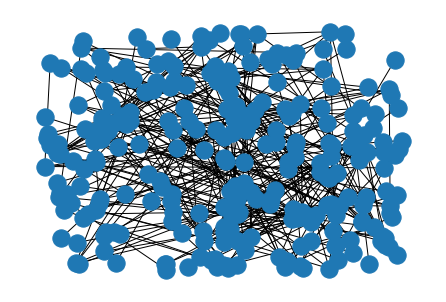

In [7]:
nx.draw_random(G)

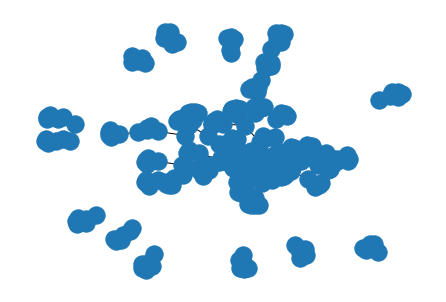

In [8]:
nx.draw_spring(G)

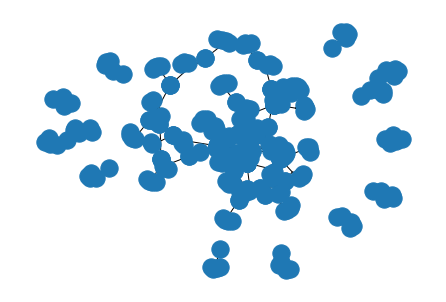

In [20]:
# prob1
nx.draw(G,nodelist=test.Kaggle)#,node_size=test.Weight)


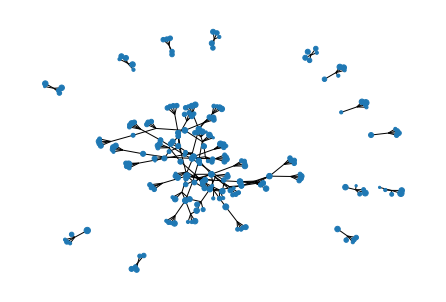

In [21]:
# prob2
nx.draw(G,nodelist=test.Kaggle,node_size=test.Weight)

ValueError: s must be a scalar, or float array-like with the same size as x and y

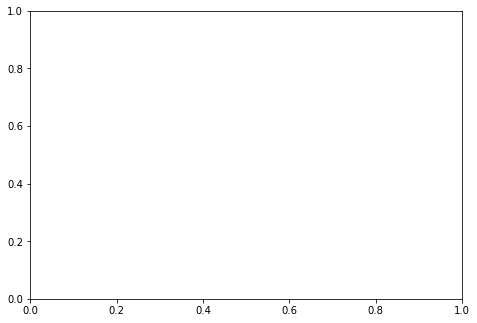

In [60]:
node_size = []
nx.draw(G,nodelist=test.Kaggle,node_size=[node_size.append(1) for ii in range(G.number_of_nodes())])

In [65]:
test.Kaggle
# G.number_of_nodes()

0      https://www.kaggle.com/mczielinski/bitcoin-his...
1      https://www.kaggle.com/allen-institute-for-ai/...
2           https://www.kaggle.com/datasnaek/youtube-new
3      https://www.kaggle.com/sudalairajkumar/novel-c...
4      https://www.kaggle.com/bappekim/air-pollution-...
                             ...                        
275    https://www.kaggle.com/berkeleyearth/climate-c...
276    https://www.kaggle.com/washingtongold/wildfire...
277    https://www.kaggle.com/robikscube/hourly-energ...
278    https://www.kaggle.com/imdevskp/corona-virus-r...
279    https://www.kaggle.com/frtgnn/500-richest-peop...
Name: Kaggle, Length: 280, dtype: object

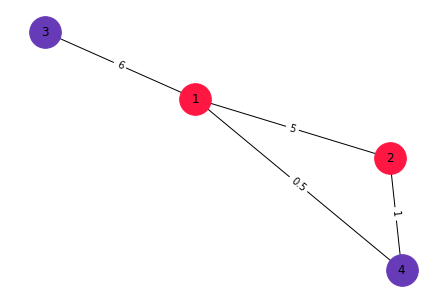

In [67]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

G.add_edge(1, 2, weight=5)
G.add_edge(1, 3, weight=6)
G.add_edge(1, 4, weight=2)
G.add_edge(2, 4, weight=1)
G.add_edge(1, 4, weight=0.5)


# positions for all nodes using, Fruchterman-Reingold force-directed algorithm
# spring_layout 이나 kamada_kawai_layout이 젤 낫다.
pos=nx.spring_layout(G)

nx.draw(G, pos=pos, with_labels=True)

# Add edge labels
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

'''
Node Color
https://goo.gl/4ETMpV
size 300 default
node_shape, alpha, cmap, vmin, vmax, ax, linewidths, label, **kwds
'''
nx.draw_networkx_nodes(G, pos,
                       nodelist=[1, 2],  # 노드 이름
                       node_color='#FF1744',  # 기본 'r', 'g', 'b' 색 지원
                       node_size=1000)

nx.draw_networkx_nodes(G, pos,
                       nodelist=[3, 4],
                       node_color='#673AB7',
                       node_size=1000)

# Save graph as png file
plt.savefig("graph.png")
# Show
plt.show()


In [90]:
namelist = []
kagglelist = []
for ii, node in enumerate(G):
    if node[:5] == 'https':
        kagglelist.append(node)
    else:
        namelist.append(node)

In [92]:
# list(G.nodes())
kagglelist

['Urm, Jae Jung',
 'Lee, Jaeyong',
 'Kim, Jaehee',
 'Yang, Jaeyeong',
 'Kim, Junmo',
 'Lee, Seungju',
 'Lee, Jewoo',
 'Brandl, Florian Lukas',
 'Park, Jinwon',
 'Ham, Yoonhee',
 'Chang, Jaewon',
 'Yoo, Jaekyun',
 'Koller, Pia',
 'Jeong, Jinseo',
 'Park, Jung Ho',
 'Shin, Yoon Jae',
 'Chung, Jiwan',
 'Lau, Oi Yee',
 'Bansal, Parth',
 'Kim, Jongwon',
 'Lee, Inhoe',
 'Kang, Dong Sig',
 'Ledwon, Dennis Michael',
 'Park, Ju Yeon',
 'Sluimer, Jasper',
 'Lim, Chan Song',
 'Logghe, Jubeline Jacqueline L',
 'Kim, Chongmin',
 'Lee, Sumin',
 'Kim, Haesung',
 'Lee, Kyuho',
 'Kim, Hyunwoo',
 'Oh, Sewon',
 'Stepanov, Ilya',
 'Na, Doori',
 'Bernier, Clement',
 'Shetty, Marguerite Indrayani',
 'Chung, Chaeyoung',
 'Suard, Steve',
 'Hwang, Doohyun',
 'Nguyen, Tuan Nghia',
 'Doret, Norman',
 'Xu, Shu',
 'Kim, Tae Kyoung',
 'Lee, Jueon',
 'Chai, Kyuwook ',
 'Chun, Ye Ji',
 'Ji, Seungyeong',
 'Kim, Myungdong',
 'Buisson, Antoine',
 'Kwack, Taeye',
 'Jo, Iksu',
 'Seok, Ji Heon',
 'Cho, Minsoo',
 'Park, Jis

In [80]:
for ii, node in enumerate(G):
    print(ii, node)

0 Urm, Jae Jung
1 https://www.kaggle.com/mczielinski/bitcoin-historical-data
2 https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge
3 https://www.kaggle.com/datasnaek/youtube-new
4 https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset
5 https://www.kaggle.com/bappekim/air-pollution-in-seoul
6 Lee, Jaeyong
7 https://www.kaggle.com/nicolaswattiez/skillbuilder-data-2009-2010
8 https://www.kaggle.com/rocki37/open-university-learning-analytics-dataset
9 https://www.kaggle.com/anhtu96/ednet-kt34
10 https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset
11 https://www.kaggle.com/wanghaohan/confused-eeg
12 Kim, Jaehee
13 https://www.kaggle.com/camnugent/sandp500
14 https://www.kaggle.com/dgawlik/nyse
15 https://www.kaggle.com/usernam3/shopify-app-store
16 https://www.kaggle.com/stackoverflow/stackoverflow
17 https://www.kaggle.com/hernan4444/anime-recommendation-database-2020
18 Yang, Jaeyeong
19 https://www.kaggle.com/arjunprasadsarkhel/20

In [10]:
# using pyvis
from pyvis.network import Network
# create vis network
net = Network(notebook=True)
# load the networkx graph
net.from_nx(G)
# show
net.show('example.html')

In [40]:
# # for ii in G.edges(data=True):
# #     print(ii[2]['Weight'])
# G.add_edges_from(("node{}".format(e[0]), "node{}".format(e[1]),{'weight':e[2]['Weight']}) for e in G.edges(data=True))

30
15
25
15
15
20
30
20
15
20
20
30
20
20
20
20
20
25
25
20
25
20
10
10
20
30
30
10
30
20
18
10
25
20
25
20
10
15
25
5
26
23
20
17
14
15
30
30
20
25
15
25
15
25
20
20
20
15
17
25
23
30
20
15
20
30
20
30
10
15
20
5
20
20
20
35
30
15
15
5
20
25
15
30
10
25
20
20
20
20
20
30
40
15
15
20
20
25
30
30
20
30
5
15
20
30
30
30
10
20
20
20
40
20
10
10
10
10
20
20
15
10
30
25
20
20
20
20
20
20
20
20
20
30
10
30
5
5
30
5
25
20
15
20
30
20
15
25
20
15
40
10
10
30
10
25
25
20
10
15
30
15
30
25
22
10
25
30
10
25
30
20
10
25
20
20
20
20
10
30
10
10
20
30
10
30
10
20
15
25
15
25
15
20
20
40
30
20
20
20
10
20
20
15
25
20
5
20
25
35
15
15
10
10
30
10
15
20
35
10
20
20
10
10
20
30
40
30
15
10
5
15
30
20
15
20
10
30
25
30
15
5
25
25
30
30
25
20
20
5
25
10
25
20
20
25
10
25
20
20
25
15
10
20
30
15
10
20
20
20
20
20
15
15
20
30
20
10
25
5


KeyError: 'Weight'

Edge with weights

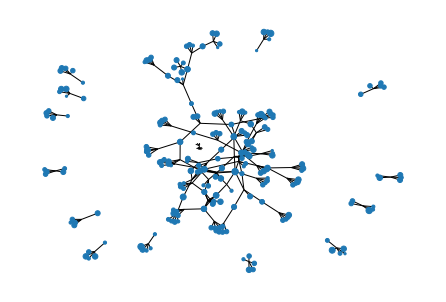

In [43]:
nx.draw(G,nodelist=test.Kaggle,node_size=test.Weight)

In [ ]:
nx.draw_networkx_edges(
        G, pos, edge_color=[e[2]['weight'] for e in G.edges(data=True)],
        width=5, edge_cmap=plt.cm.Greys, style='dashed'
    )

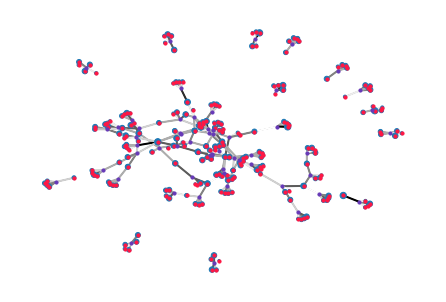

In [168]:
import matplotlib.pyplot as plt
pos = nx.spring_layout(G)
nx.draw(G,nodelist=test.Kaggle,node_size=test.Weight,pos=pos)
labels = nx.get_edge_attributes(G,'Weight')
weights = nx.get_edge_attributes(G,'Weight')
nx.draw_networkx_edges(G,pos,edge_color=[e[2]['Weight'] for e in G.edges(data=True)],
        width=2, edge_cmap=plt.cm.Greys, style='-')

namelist = []
kagglelist = []
for ii, node in enumerate(G):
    if node[:5] == 'https':
        kagglelist.append(node)
    else:
        namelist.append(node)

nx.draw_networkx_nodes(G, pos,
                       nodelist=kagglelist,  # 노드 이름
                       node_color='#FF1744',  # 기본 'r', 'g', 'b' 색 지원
                       node_size=10)

nx.draw_networkx_nodes(G, pos,
                       nodelist=namelist,
                       node_color='#673AB7',
                       node_size=10)

In [122]:
nx.number_connected_components(G)
compsize = []
[compsize.append(len(ii)) for ii in nx.connected_components(G)]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [130]:
len(sorted(nx.connected_components(G), key = len, reverse=True)[0])

191

In [140]:
not_main_list = []
for ii in sorted(nx.connected_components(G), key = len, reverse=True)[1:]:
    not_main_list.append(sorted(list(ii))[0])
not_main_list

['Kim, Jaehee',
 'Kim, Junmo',
 'Ham, Yoonhee',
 'Koller, Pia',
 'Shin, Yoon Jae',
 'Bansal, Parth',
 'Sluimer, Jasper',
 'Kim, Chongmin',
 'Kim, Hyunwoo',
 'Oh, Sewon',
 'Na, Doori',
 'Doret, Norman',
 'Buisson, Antoine']

In [144]:
a=sorted(nx.connected_components(G), key = len, reverse=True)[0]
bottom_nodes, top_nodes = bipartite.sets(a)

AttributeError: 'set' object has no attribute 'is_directed'

In [145]:
S = [G.subgraph(c).copy() for c in nx.connected_components(G)]

In [155]:
G_main = G.subgraph(sorted(nx.connected_components(G), key = len, reverse=True)[0])

In [157]:
bottom_nodes, top_nodes = bipartite.sets(G_main)

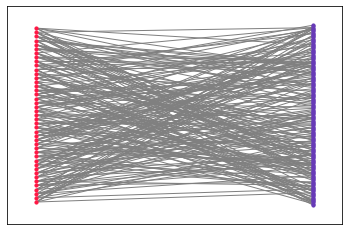

In [172]:
cbg = nx.complete_bipartite_graph(bottom_nodes,top_nodes)
def bipartite_layout(inputG):
    ## bipartite한 graph의 layout
    if nx.is_bipartite(inputG) and nx.is_connected(inputG):## connected and bipartite
        bs1, bs2 = nx.bipartite.sets(inputG)
        pos = {}
        pos.update({n:(0, 1.0/(len(bs1)+1)*(i+1)) for i, n in enumerate(bs1)})
        pos.update({n:(1, 1.0/(len(bs2)+1)*(i+1)) for i, n in enumerate(bs2)})
        return pos
    else:# 이 경우 none을 리턴하므로, default layout으로 그림이 그려지게 됩니다. 
        print("it is not bipartite and not connected")

pos = bipartite_layout(cbg)

nx.draw_networkx_edges(G_main,pos,edge_color='gray',
        width=1, style='-')

# nx.draw_networkx(cbg, pos = pos)
nx.draw_networkx_nodes(bottom_nodes, pos,
                       node_color='#FF1744',  # 기본 'r', 'g', 'b' 색 지원
                       node_size=10)
nx.draw_networkx_nodes(top_nodes, pos,
                       node_color='#673AB7',  # 기본 'r', 'g', 'b' 색 지원
                       node_size=10)

In [195]:
a=nx.closeness_centrality(G_main)
a_list = []
list(a.keys())
for ii in list(a.keys()):
    if ii[:5] != 'https':
        print(f'Name: {ii} / Closeness: {a[ii]}')
        a_list.append(a[ii])


Name: Urm, Jae Jung / Closeness: 0.17055655296229802
Name: Lee, Jaeyong / Closeness: 0.12942779291553133
Name: Yang, Jaeyeong / Closeness: 0.140117994100295
Name: Lee, Seungju / Closeness: 0.18164435946462715
Name: Lee, Jewoo / Closeness: 0.13231197771587744
Name: Brandl, Florian Lukas / Closeness: 0.1557377049180328
Name: Park, Jinwon / Closeness: 0.15912897822445563
Name: Chang, Jaewon / Closeness: 0.09978991596638656
Name: Yoo, Jaekyun / Closeness: 0.17723880597014927
Name: Jeong, Jinseo / Closeness: 0.1721014492753623
Name: Park, Jung Ho / Closeness: 0.15912897822445563
Name: Chung, Jiwan / Closeness: 0.16695957820738136
Name: Lau, Oi Yee / Closeness: 0.140117994100295
Name: Kim, Jongwon / Closeness: 0.1235370611183355
Name: Lee, Inhoe / Closeness: 0.17117117117117117
Name: Kang, Dong Sig / Closeness: 0.1445966514459665
Name: Ledwon, Dennis Michael / Closeness: 0.1235370611183355
Name: Park, Ju Yeon / Closeness: 0.17148014440433212
Name: Lim, Chan Song / Closeness: 0.15031645569620

In [197]:
b=nx.betweenness_centrality(G_main)
b_list = []
list(b.keys())
for ii in list(b.keys()):
    if ii[:5] != 'https':
        print(f'Name: {ii} / Closeness: {b[ii]}')
        b_list.append(b[ii])

Name: Urm, Jae Jung / Closeness: 0.041771094402673355
Name: Lee, Jaeyong / Closeness: 0.041771094402673355
Name: Yang, Jaeyeong / Closeness: 0.041771094402673355
Name: Lee, Seungju / Closeness: 0.24585482666100883
Name: Lee, Jewoo / Closeness: 0.029379795654678305
Name: Brandl, Florian Lukas / Closeness: 0.08809510548858931
Name: Park, Jinwon / Closeness: 0.04546821800372339
Name: Chang, Jaewon / Closeness: 0.041771094402673355
Name: Yoo, Jaekyun / Closeness: 0.1590960054934647
Name: Jeong, Jinseo / Closeness: 0.06361421229842289
Name: Park, Jung Ho / Closeness: 0.04546821800372339
Name: Chung, Jiwan / Closeness: 0.041771094402673355
Name: Lau, Oi Yee / Closeness: 0.041771094402673355
Name: Kim, Jongwon / Closeness: 0.041771094402673355
Name: Lee, Inhoe / Closeness: 0.09372968229059614
Name: Kang, Dong Sig / Closeness: 0.0893845062391428
Name: Ledwon, Dennis Michael / Closeness: 0.041771094402673355
Name: Park, Ju Yeon / Closeness: 0.14883612751616077
Name: Lim, Chan Song / Closeness: 

In [202]:
import numpy as np
corrcoef=np.corrcoef(a_list,b_list)
corrcoef[0,1]

0.45099815288059575

In [214]:
import numpy as np
corrcoef=np.corrcoef(a_list,b_list)
corrcoef[0,1]


0.45099815288059575